In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Zacznijmy od przygotowania danych

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
true_data = np.concatenate((x_train, x_test))/256
print('Input data shape:', true_data.shape)

Using TensorFlow backend.


Input data shape: (70000, 28, 28)


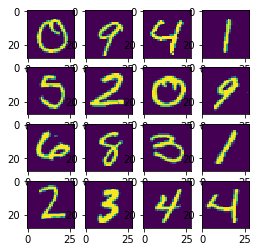

In [3]:
Nx = 4
Ny = 4

imgs_to_display = np.random.randint(true_data.shape[0], size=Nx*Ny)

fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(true_data[imgs_to_display[k]])


# Stwórzmy prosty przykładowy generator

In [4]:
from keras.models import  Sequential
from keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape, Conv2DTranspose

generator_test_model = Sequential()

generator_test_model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
generator_test_model.add(BatchNormalization())
generator_test_model.add(LeakyReLU(alpha=0.3))
# shape: (7*7*256)

generator_test_model.add(Reshape((7,7,256)))
# shape: (7,7,256)
generator_test_model.add(Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', use_bias=False))
# shape: (7,7,128)
generator_test_model.add(BatchNormalization())
generator_test_model.add(LeakyReLU(alpha=0.3))

generator_test_model.add(Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))
# shape (14,14,64)
generator_test_model.add(BatchNormalization())
generator_test_model.add(LeakyReLU(alpha=0.3))

generator_test_model.add(Conv2DTranspose(filters=1, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))
# shape(28,28,1)

(16, 28, 28, 1)


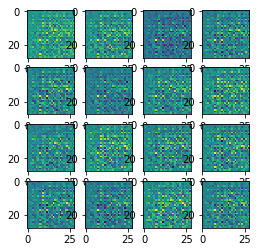

In [5]:
test_gen_out = generator_test_model.predict(np.random.rand(Nx*Ny, 100))

fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(test_gen_out[k,:,:,0])

print(test_gen_out.shape)

# Sprawdźmy czy ma on szanse zadziałać

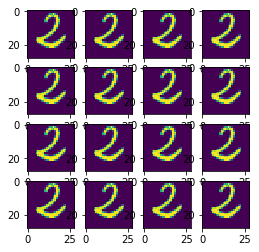

In [6]:
inputs = np.random.rand(Nx*Ny, 100)

random_index = np.random.randint(true_data.shape[0], size=1)
outputs = np.broadcast_to(true_data[random_index], (Nx*Ny,28,28))
outputs = np.expand_dims(outputs, axis=3)

fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(outputs[k,:,:,0])

In [7]:
generator_test_model.compile(optimizer='adadelta', loss='mean_squared_error')
generator_test_model.fit(x=inputs, y=outputs, epochs=20, verbose=True)

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 0.3691
Epoch 2/20
16/16 [==============================] - 0s 994us/step - loss: 0.2926
Epoch 3/20
16/16 [==============================] - 0s 963us/step - loss: 0.5377
Epoch 4/20
16/16 [==============================] - 0s 969us/step - loss: 0.2952
Epoch 5/20
16/16 [==============================] - 0s 991us/step - loss: 0.2045
Epoch 6/20
16/16 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 7/20
16/16 [==============================] - 0s 938us/step - loss: 0.1109
Epoch 8/20
16/16 [==============================] - 0s 922us/step - loss: 0.0625
Epoch 9/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 10/20
16/16 [==============================] - 0s 885us/step - loss: 0.0289
Epoch 11/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 12/20
16/16 [==============================] - 0s 868us/step - loss: 0.0274
Epoch 13/20
16/16 [=============

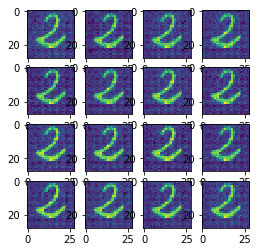

In [8]:
test_gen_out = generator_test_model.predict(inputs)

fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(test_gen_out[k,:,:,0])

# Stwórzmy teraz dyskrimator

In [9]:
from keras.layers import Conv2D, Dropout, Flatten

discrimator_test_model = Sequential()

discrimator_test_model.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=(28,28,1)))
discrimator_test_model.add(LeakyReLU())
discrimator_test_model.add(Dropout(0.3))

discrimator_test_model.add(Conv2D(128, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=(28,28,1)))
discrimator_test_model.add(LeakyReLU())
discrimator_test_model.add(Dropout(0.3))

discrimator_test_model.add(Flatten())
discrimator_test_model.add(Dense(1, activation='sigmoid'))


In [10]:
test_disc_out = discrimator_test_model.predict(np.random.rand(1, 28, 28, 1))
print(test_disc_out)

[[ 0.50118059]]


In [11]:
inputs = np.empty((32, 28, 28, 1))
random_index = np.random.randint(true_data.shape[0], size=16)
inputs[:16,:,:,0] = true_data[random_index]
inputs[16:] = np.random.rand(16,28,28,1)

labels = np.zeros((32))
labels[:16] = 1

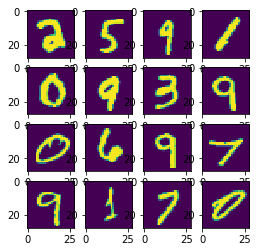

In [12]:
fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(inputs[k,:,:,0])

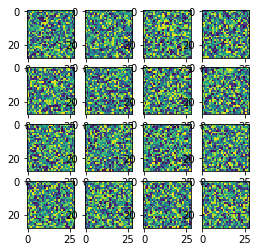

In [13]:
fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(inputs[16+k,:,:,0])

In [14]:
discrimator_test_model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
discrimator_test_model.fit(x=inputs, y=labels, epochs=10, verbose=True)

Epoch 1/10
32/32 [==============================] - 0s 8ms/step - loss: 0.7032 - acc: 0.3125
Epoch 2/10
32/32 [==============================] - 0s 186us/step - loss: 0.5967 - acc: 0.7812
Epoch 3/10
32/32 [==============================] - 0s 230us/step - loss: 0.4932 - acc: 0.8438
Epoch 4/10
32/32 [==============================] - 0s 196us/step - loss: 0.3505 - acc: 0.9688
Epoch 5/10
32/32 [==============================] - 0s 330us/step - loss: 0.2164 - acc: 1.0000
Epoch 6/10
32/32 [==============================] - 0s 273us/step - loss: 0.1008 - acc: 1.0000
Epoch 7/10
32/32 [==============================] - 0s 215us/step - loss: 0.0508 - acc: 1.0000
Epoch 8/10
32/32 [==============================] - 0s 234us/step - loss: 0.0337 - acc: 1.0000
Epoch 9/10
32/32 [==============================] - 0s 263us/step - loss: 0.0217 - acc: 1.0000
Epoch 10/10
32/32 [==============================] - 0s 199us/step - loss: 0.0156 - acc: 1.0000


In [15]:
discrimator_test_model.predict(inputs)

array([[ 0.99824286],
       [ 0.99223244],
       [ 0.99604827],
       [ 0.98563749],
       [ 0.99617296],
       [ 0.9996655 ],
       [ 0.99672395],
       [ 0.98789597],
       [ 0.93017197],
       [ 0.98982012],
       [ 0.99289507],
       [ 0.97117764],
       [ 0.97456092],
       [ 0.96642226],
       [ 0.9907437 ],
       [ 0.98122543],
       [ 0.00333142],
       [ 0.00958932],
       [ 0.00565013],
       [ 0.00585924],
       [ 0.00790495],
       [ 0.0067914 ],
       [ 0.00725473],
       [ 0.00334898],
       [ 0.00429734],
       [ 0.00550965],
       [ 0.00568323],
       [ 0.00515412],
       [ 0.0018834 ],
       [ 0.00185442],
       [ 0.00319695],
       [ 0.00601607]], dtype=float32)

# Teraz to połączmy

In [16]:
from keras.models import Model
from keras.layers import Input
from tqdm import trange

class GAN:
    def __init__(self, images):
        self.images = images
        
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        self.generator = self.build_generator()
        
        noise = Input(shape=(100,))
        img = self.generator(noise)
        
        self.discriminator.trainable = False
        
        out = self.discriminator(img)
        
        self.gan = Model(noise, out)
        self.gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        self.gif_noise = np.random.rand(16, 100)
        self.to_gif = []
        
    def build_generator(self):
        model = Sequential()

        model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.3))

        model.add(Reshape((7,7,256)))
        model.add(Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.3))

        model.add(Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.3))

        model.add(Conv2DTranspose(filters=1, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))
        
        return model
    
    def build_discriminator(self):
        model = Sequential()

        model.add(Conv2D(64, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=(28,28,1)))
        model.add(LeakyReLU())
        model.add(Dropout(0.3))

        model.add(Conv2D(128, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=(28,28,1)))
        model.add(LeakyReLU())
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        
        return model
    
    def generate_images(self, n_images):
        return self.generator.predict(np.random.rand(n_images,100))
            
    def train(self, epochs, batch_size):
        g_input = np.empty((batch_size, 100))
        d_input = np.empty((batch_size, 28, 28, 1))
        
        d_labels = np.zeros((batch_size))
        d_labels[int(batch_size/2):] = 1
        
        g_labels = np.zeros((batch_size))
        
        with trange(epochs) as t:
            for epoch in t:
                idx = np.random.randint(true_data.shape[0], size=int(batch_size/2))

                d_input[:int(batch_size/2),:,:,0] = self.images[idx]

                noise = np.random.rand(int(batch_size/2), 100)
                d_input[int(batch_size/2):] = self.generator.predict(noise)

                d_loss = self.discriminator.train_on_batch(d_input, d_labels)

                g_input = np.random.rand(batch_size, 100)

                g_loss = self.gan.train_on_batch(g_input, g_labels)

                t.set_postfix(d_loss=d_loss[0], d_acc=d_loss[1], g_loss=g_loss[0], g_acc=g_loss[1])
                
                if epoch % 20 == 0:
                    gif_output = self.generator.predict(self.gif_noise)
                    gif_i = np.empty((28*4, 28*4))
                    for i in range(4):
                        for j in range(4):
                            gif_i[i*28: i*28+28, j*28:j*28+28] = gif_output[i*4+j,:,:,0]
                    self.to_gif.append(gif_i)
        

In [17]:
mnist_GAN = GAN(true_data)

In [18]:
mnist_GAN.train(2500, 1024)

  0%|          | 0/2500 [00:00<?, ?it/s]/home/mateusz/.local/lib/python3.6/site-packages/keras/engine/training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
 51%|█████     | 1266/2500 [09:23<09:15,  2.22it/s, d_acc=0.938, d_loss=0.185, g_acc=0.326, g_loss=1.27]  


KeyboardInterrupt: 

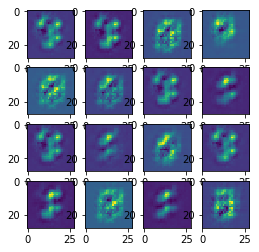

In [19]:
out = mnist_GAN.generator.predict(np.random.rand(16,100))
fig = plt.figure(figsize=(Ny,Nx))
for i in range(Ny):
    for j in range(Nx):
        k = i*Nx + j
        fig.add_subplot(Ny, Nx, k+1)
        plt.imshow(out[k,:,:,0])

In [20]:
import imageio as io

io.mimwrite('mnist.gif', mnist_GAN.to_gif)

In [ ]:
true_data[0]